In [169]:
# data: 01/22/2020
# first attempt using basic models
# to be modularized

# Loading Packages

In [12]:
import numpy as np
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
import re
import gensim
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Loading data

In [13]:
from collections import Counter as C

In [14]:
data = pd.read_csv('steam-reviews-dataset/steam_reviews.csv')

In [15]:
data.columns

Index(['date_posted', 'funny', 'helpful', 'hour_played',
       'is_early_access_review', 'recommendation', 'review', 'title'],
      dtype='object')

In [16]:
sorted(C(data.title).items(), key = lambda x: x[1], reverse = True)

[("PLAYERUNKNOWN'S BATTLEGROUNDS", 145685),
 ('Grand Theft Auto V', 99956),
 ('Rust', 71088),
 ('Rocket League®', 67907),
 ('Dead by Daylight', 22221),
 ('MONSTER HUNTER: WORLD', 18412),
 ('ASTRONEER', 2661),
 ('The Elder Scrolls V: Skyrim Special Edition', 1473),
 ('RESIDENT EVIL 2 / BIOHAZARD RE:2', 1385),
 ('Sid Meier’s Civilization® VI', 522),
 ('Euro Truck Simulator 2', 501),
 ('Terraria', 260),
 ('Slay the Spire', 260),
 ('Subnautica', 247),
 ('Left 4 Dead 2', 221),
 ('Insurgency: Sandstorm', 220),
 ('RimWorld', 204),
 ("Garry's Mod", 202),
 ('Stardew Valley', 202),
 ('ARK: Survival Evolved', 195),
 ('Divinity: Original Sin 2 - Definitive Edition', 190),
 ('Human: Fall Flat', 172),
 ('Wallpaper Engine', 170),
 ('Factorio', 170),
 ("Don't Starve Together", 165),
 ('Wargroove', 10),
 ('Cold Waters', 10),
 ('Tannenberg', 10),
 ('Pathfinder: Kingmaker', 10),
 ('Football Manager 2019', 10),
 ('Moonlighter', 10),
 ('GOD EATER 3', 10),
 ('Subnautica: Below Zero', 10),
 ("Tom Clancy's Ra

In [17]:
print(np.sum(data.isna(), axis=0))

data = data.fillna('') # only the comments has NaN's
rws = data.review.values
rws_len = np.array(list(map(len, rws)))
h = data.helpful.values

date_posted                  0
funny                        0
helpful                      0
hour_played                  0
is_early_access_review       0
recommendation               0
review                    1516
title                        0
dtype: int64


In [18]:
# nlp
# 0. tokenize (sentence, word)
# 1. lower case
# 2. stemming

In [19]:
# Word Embedding

import gensim

model = gensim.models.KeyedVectors.load_word2vec_format('./steam-reviews-dataset/enwiki_20180420_100d.txt', binary=False, limit=50000)

In [21]:
stop_words = set(stopwords.words('english'))
sw = stop_words.union(set(['cant', 'cannot', 'can\'t', 'wont', 'won\'t']))

In [22]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [23]:
rws = data.review.values
rws = list(map(lambda w: w.lower(), rws))
rws = list(map(lambda w: re.sub(r'&gt|&lt', ' ', w), rws))
rws = list(map(lambda w: re.sub(r'([a-z])\1{3,}', r'\1', w), rws))
# x = list(map(lambda w: re.sub(r'\'', '', w), x))
# x = list(map(lambda w: re.sub(), x))

# x = list(map(lambda w: w.strip(string.punctuation), x))
# x = list(map(lambda w: w.split(string.punctuation+' '), x))
# x = list(map(lambda w: re.sub(r'[^\w\s]', ' ', w), x))

# lowercase

In [26]:
def lower(w):
    return w.lower()

# Filtering out non-english

In [27]:
from language_detector import detect_language

In [28]:
# filtering out non-english reviews
q = []
for _ in rws:
    if detect_language(_) == 'English':
        q.append(_)

In [29]:
# filtering out non english words

# filtering out punctuation

In [30]:
def f_punct(w):
    """
    filting out punctuations
    """
    return [word for word in w if word.isalpha()]

In [31]:
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# lemmatize


In [32]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def f_lem(w):
    """
    lemmatization
    """
    return [lemmatizer.lemmatize(lemmatizer.lemmatize(lemmatizer.lemmatize(word, pos='v'), pos='a'), pos='n') for word in w]

# filtering out stop_words

In [33]:
def f_stopw(w):
    """
    filtering out stop words
    """
    return [word for word in w if word not in sw]

# Normalization

In [34]:
# rly -> really
# aggro -> aggressive

In [35]:
res = []
for i, x in enumerate(q[:20000]):
    print(i, end='\r')
    res.append(f_stopw(f_lem(f_punct(word_tokenize(lower(x))))))

In [36]:
corpus = list(map(lambda x: ' '.join(x), res))

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(corpus)

len(tfidf.get_feature_names())

20220

# Typo Correction

In [37]:
import pkg_resources
from symspellpy import SymSpell, Verbosity

sym_spell = SymSpell(max_dictionary_edit_distance=4, prefix_length=7)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt")
# term_index is the column of the term and count_index is the
# column of the term frequency
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)


True

In [38]:
res2 = []
# review
for ite, r in enumerate(res):
    # word
    print(ite, end='\r')
    tmp = []
    for w in r:
        suggestions = sym_spell.lookup(w, Verbosity.CLOSEST,
                               max_edit_distance=3)
        # display suggestion term, term frequency, and edit distance
        if suggestions:
            tmp.append(suggestions[0].term)
        else:
            pass
            # word segementation
#             print(ite, w, end='r')
#             w_seg = sym_spell.word_segmentation(phrase=w)
#             tmp.extend(w_seg.corrected_string.split())
        
    res2.append(tmp)

In [39]:
corpus = list(map(lambda x: ' '.join(x), res2))

tfidf = TfidfVectorizer()
tfidf.fit(corpus)

len(tfidf.get_feature_names())

11875

In [81]:
k = np.array(tfidf.get_feature_names())
v = tfidf.fit_transform(corpus).toarray()
for i, _ in enumerate(k):
    dic[_] = v[:,i]

In [109]:
def get_embedding(ws, i):
    """
    get embedding from words weighted by tfidf
    """
    r = np.zeros(100)
    ct = 0
    for w in ws:
        try:
            wt = dic[w][i]
            r += wt*model.wv[w]
            ct += wt
        except:
            pass
    
    return r/ct if ct>0 else r

In [92]:
# def get_embedding(ws):
#     """
#     get embedding from words
#     """
#     r = np.zeros(100)
#     ct = 0
#     for w in ws:
#         try:
#             r += model.wv[w]
#             ct += 1
#         except:
#             pass
    
#     return r/ct if ct>0 else r

In [173]:
vecs = np.zeros((20000, 100))
for i, ws in enumerate(res2):
    vecs[i] = get_embedding(ws, i)

/home/stve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.


In [174]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

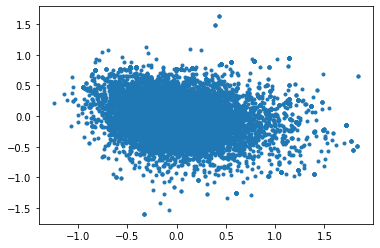

In [175]:
pca = PCA(n_components=2)
DR2_pca = pca.fit_transform(vecs)
plt.plot(*DR2_pca.T, '.')

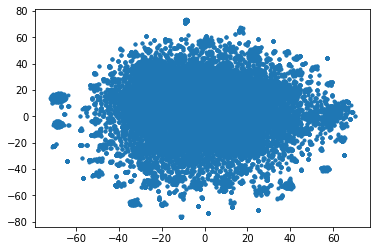

In [176]:
tsne = TSNE()
DR2 = tsne.fit_transform(vecs)
plt.plot(*DR2.T,'.')

In [177]:
from sklearn.mixture import GaussianMixture
GMM = GaussianMixture(n_components=5)
GMM.fit(vecs)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

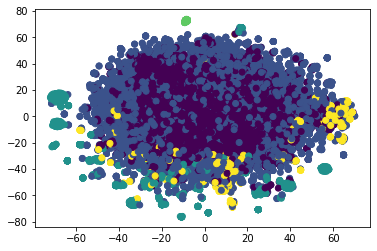

In [178]:
lbs = GMM.predict(vecs)
plt.scatter(*DR2.T, c=lbs)

In [416]:
def cos(v1, v2):
    """
    cosine similarity
    """
    return v1.dot(v2)/np.linalg.norm(v1)/np.linalg.norm(v2)

In [ ]:

## preprocess
#  1. typos (normalization lvl/level)
#  2. lemmetize
#  3. stop words

## algorithms
#  1. sentence embedding bert
#  2. giving weights to different words

In [ ]:
# ROBERDA #embedding